# Data Visualization with Matplotlib

by Esteban G. Russi

This notebook aims to delve into the features and data within the Spotify dataset, utilizing the Python library Matplotlib for visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## General Exploration

In [2]:
df = pd.read_csv('spotify_data.csv') 
df.drop(columns = 'Unnamed: 0', inplace = True)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
n_tracks = len(df.track_id)
print(f'There are {n_tracks} tracks in the dataset')

There are 114000 tracks in the dataset


## Data Visualization

To begin, we will analyze the distribution of select numerical features within the dataset. To achieve this, a histogram and a boxplot will be presented for each feature using a loop.

In [4]:
attributes = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness',
                'acousticness', 'liveness', 'tempo'] 

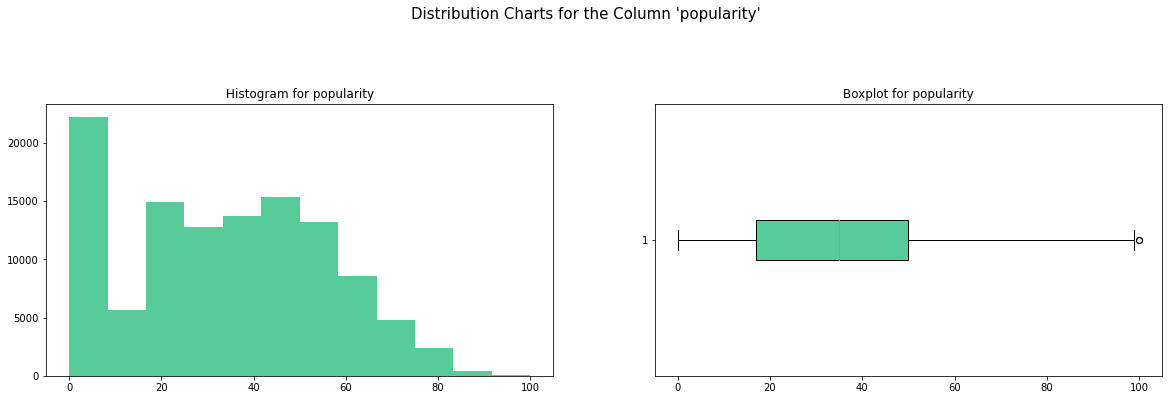

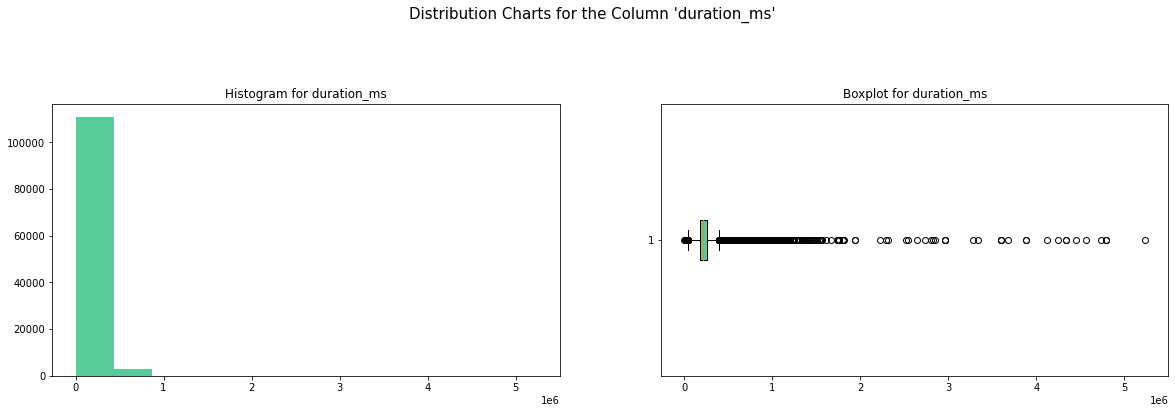

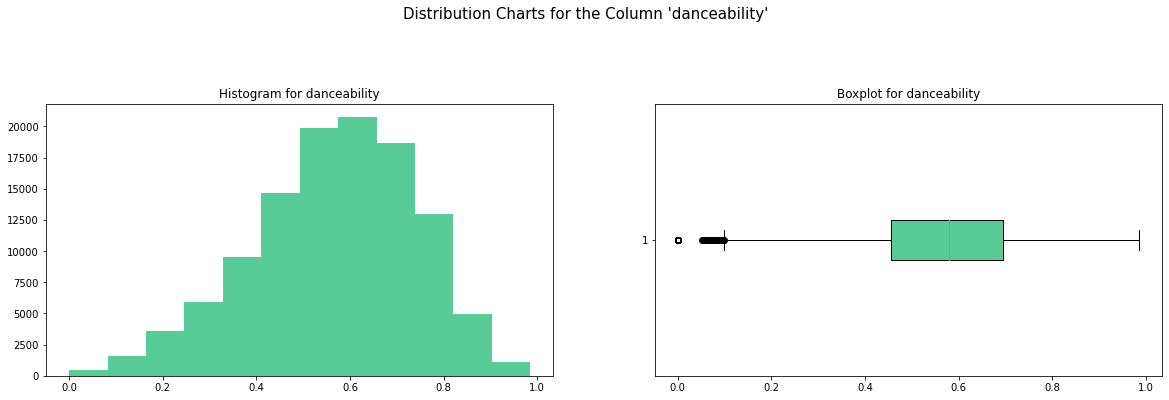

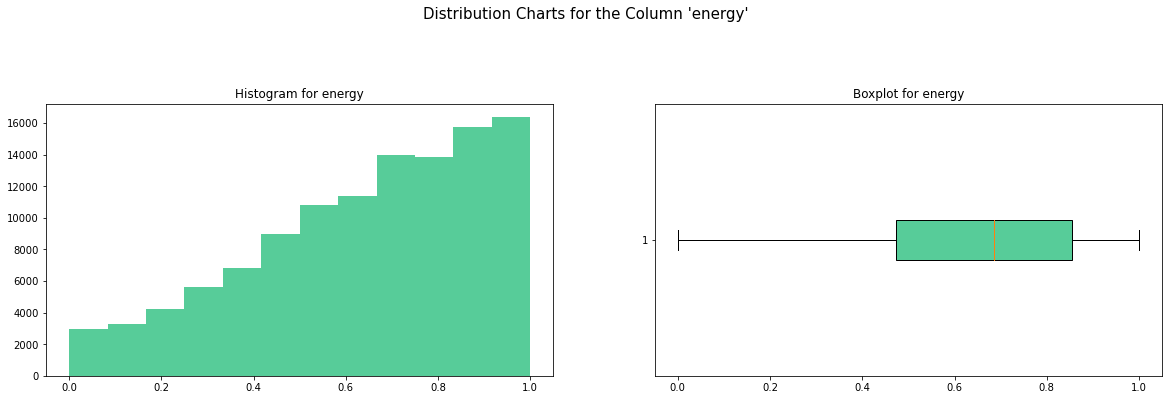

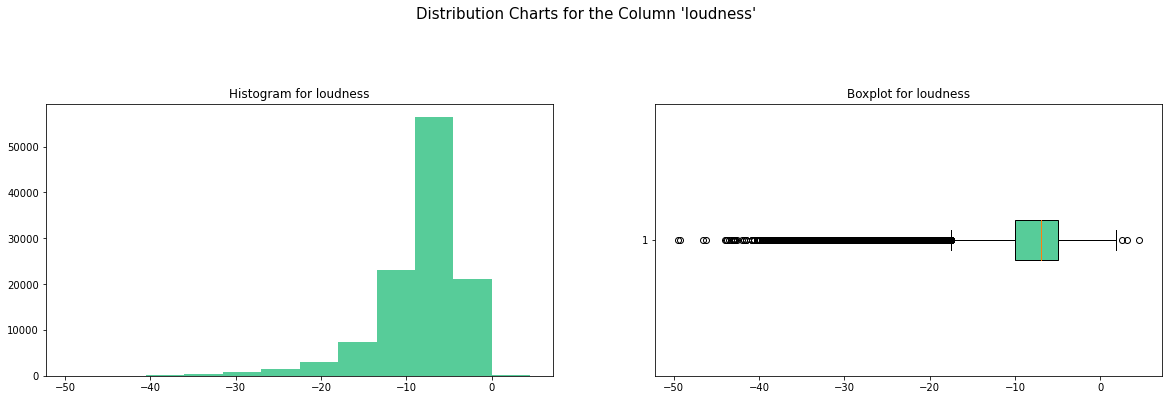

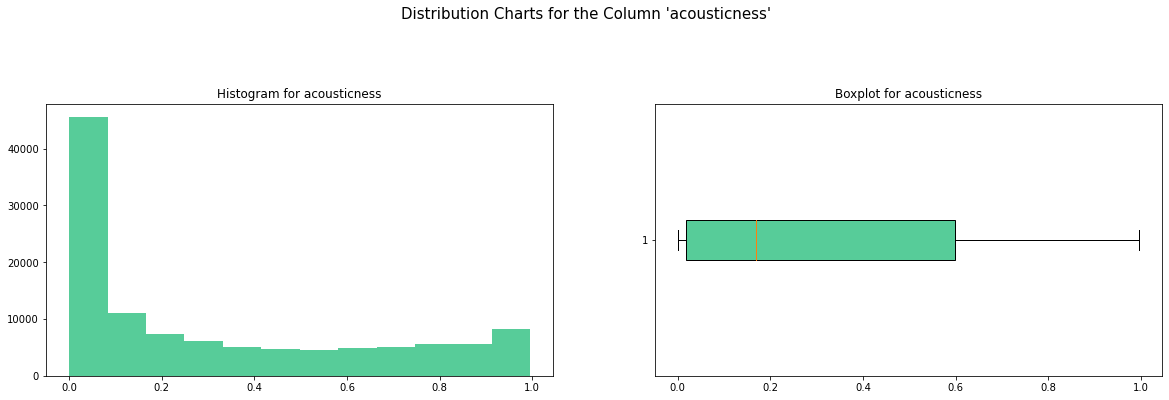

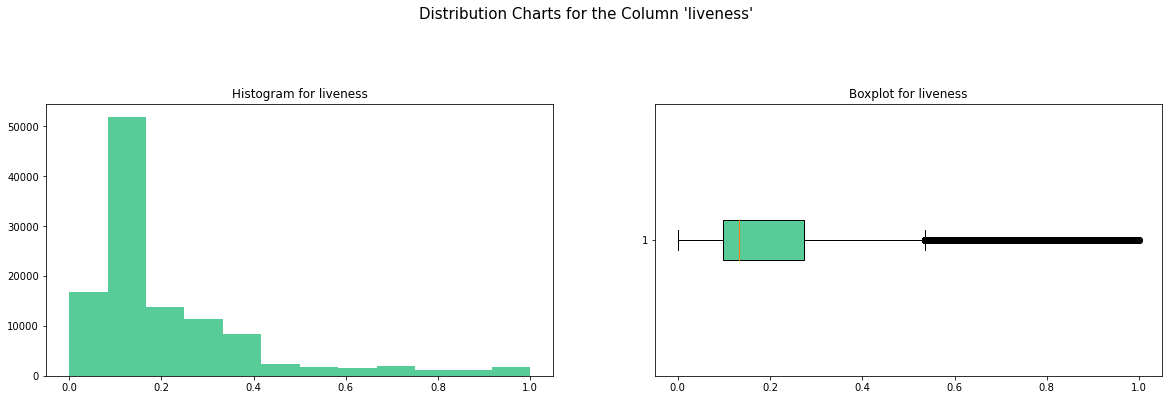

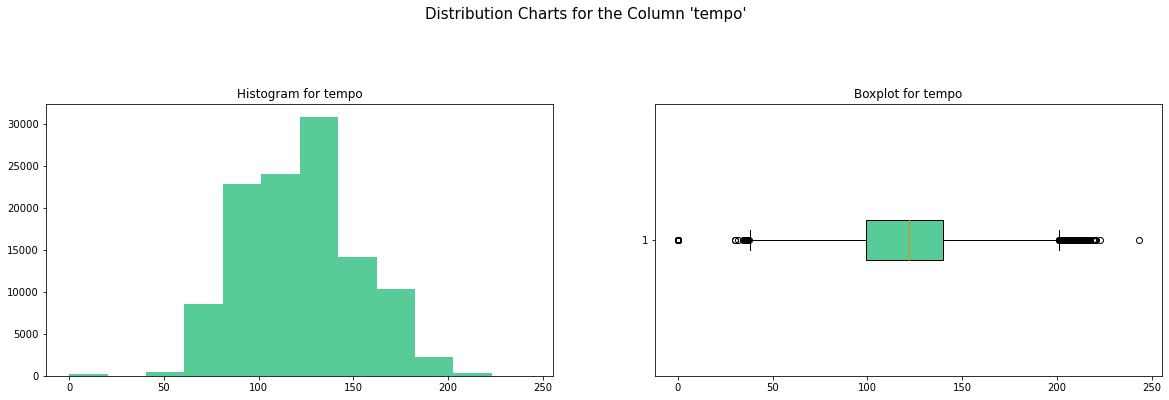

In [5]:
for item in attributes:
    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))

    # Histogram plot in the first subplot
    axes[0].hist(df[item], bins=12, color='#57CC99')

    # Boxplot plot in the second subplot
    axes[1].boxplot(df[item], vert=False, patch_artist=True, boxprops=dict(facecolor='#57CC99'))

    # Set titles for the subplots and the overall title
    plt.suptitle(f"Distribution Charts for the Column '{item}'", y=1.15, fontsize=15)
    axes[0].set_title(f"Histogram for {item}")
    axes[1].set_title(f"Boxplot for {item}")
   

    plt.grid(False) # Remove grid lines
    plt.show() # Display the plots

### Correlation Matrix

The correlation matrix illustrates the relationships among all numerical features within the dataset.

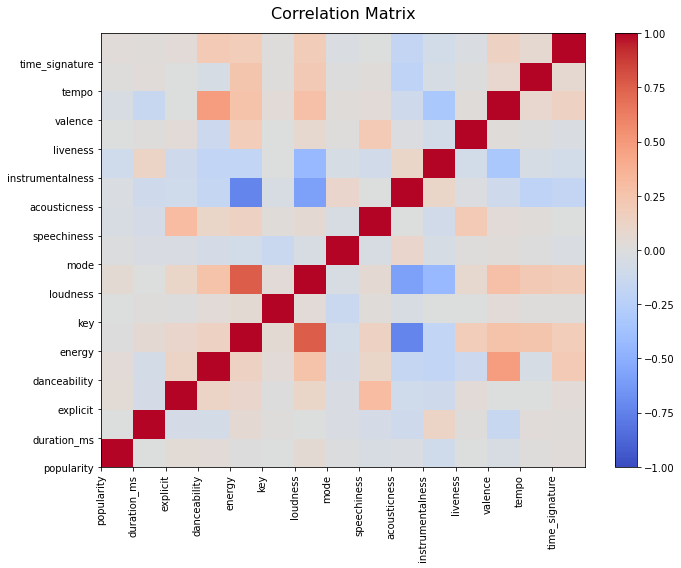

In [6]:
# Calculate the correlation matrix for the DataFrame
correlation_matrix = df.corr()

# Set up the figure and axes
plt.figure(figsize=(10, 8))

# Create a heatmap-style correlation chart using Matplotlib's pcolor function
heatmap = plt.pcolor(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Add a color bar to indicate the correlation values
plt.colorbar(heatmap)

# Set ticks at the center of each cell to label columns and rows
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Set the title of the plot and adjust layout for better spacing
plt.title('Correlation Matrix', fontsize=16, y=1.02)
plt.tight_layout()  # To make sure labels and titles fit well

# Display the plot
plt.show()

### Top 30 Artists by Number of Tracks.

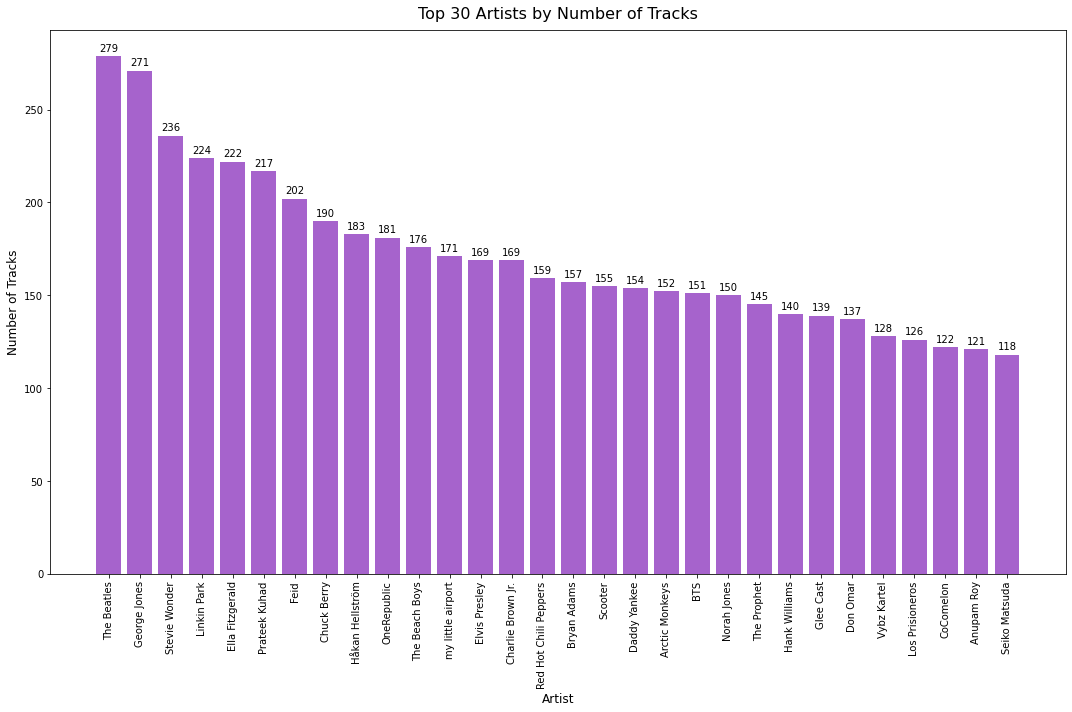

In [7]:
# Calculate the number of tracks for each artist, select top 30, and sort in descending order
artist_track_counts = df.groupby('artists')['track_id'].count().sort_values(ascending=False).head(30)

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Create vertical bar chart with bars colored in a specific color
bars = ax.bar(artist_track_counts.index, artist_track_counts.values, color='#a663cc')

# Add values to the bars
for bar in bars:
    yval = bar.get_height()
    ax.annotate(f'{yval}', xy=(bar.get_x() + bar.get_width() / 2, yval),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Set labels for the Y-axis and X-axis, and rotate X-axis labels for better readability
ax.set_ylabel('Number of Tracks', fontsize=12)
ax.set_xlabel('Artist', fontsize=12)
plt.xticks(rotation=90)

# Set the title of the plot and adjust layout for better spacing
plt.title('Top 30 Artists by Number of Tracks', fontsize=16, y=1.01)
plt.tight_layout()  # To make sure labels and titles fit well

# Display the plot
plt.show()

### Number of albums by Artist - Top 30

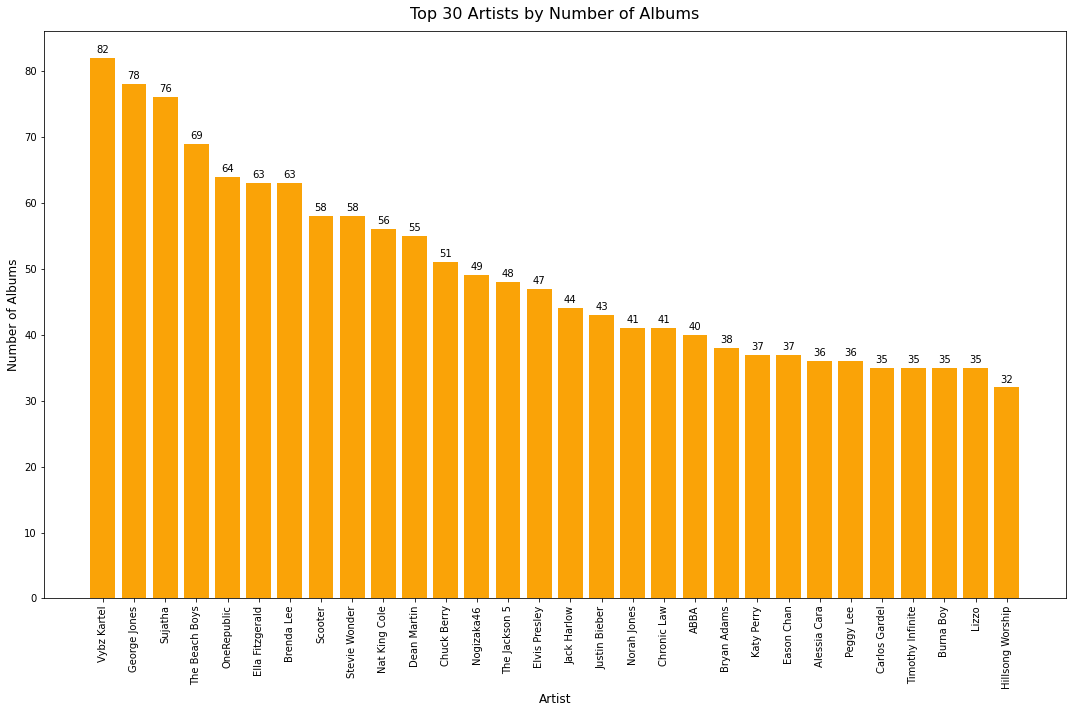

In [8]:
# Calculate the number of unique albums for each artist, select top 30, and sort in descending order
albums_by_artist = df.groupby(['artists'])['album_name'].nunique().sort_values(ascending=False).head(30)

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Create vertical bar chart with bars colored in a specific color
bars = ax.bar(albums_by_artist.index, albums_by_artist.values, color='#faa307')

# Add values to the bars
for bar in bars:
    yval = bar.get_height()
    ax.annotate(f'{yval}', xy=(bar.get_x() + bar.get_width() / 2, yval),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Set labels for the Y-axis and X-axis, and rotate X-axis labels for better readability
ax.set_ylabel('Number of Albums', fontsize=12)
ax.set_xlabel('Artist', fontsize=12)
plt.xticks(rotation=90)

# Set the title of the plot and adjust layout for better spacing
plt.title('Top 30 Artists by Number of Albums', fontsize=16, y=1.01)
plt.tight_layout()  # To make sure labels and titles fit well

# Display the plot
plt.show()

### Top Genres by Average Track Popularity

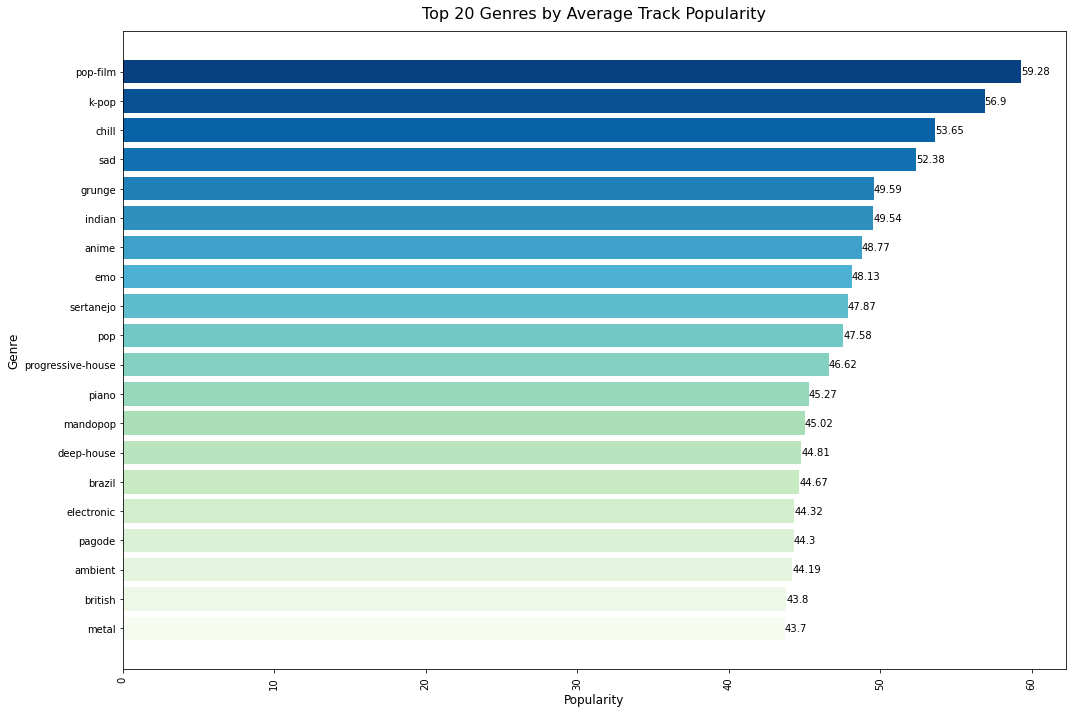

In [9]:
# Calculate the mean popularity for each genre, select top 20, and sort in ascending order
popularity_by_genre = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(20).sort_values(ascending=True)

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Generate a color palette using the GnBu colormap, based on the number of genres
color_palette = cm.get_cmap('GnBu', len(popularity_by_genre))

# Create horizontal bar chart with colored bars using the color palette
bars = ax.barh(popularity_by_genre.index, popularity_by_genre.values, color=color_palette(range(len(popularity_by_genre))))

# Set labels for the Y-axis and X-axis, and rotate X-axis labels for better readability
ax.set_ylabel('Genre', fontsize=12)
ax.set_xlabel('Popularity', fontsize=12)
plt.xticks(rotation=90)

# Set the title of the plot and adjust layout for better spacing
plt.title('Top 20 Genres by Average Track Popularity', fontsize=16, y=1.01)
plt.tight_layout()  # To make sure labels and titles fit well

# Add text labels to the bars with the corresponding popularity values
for index, value in enumerate(popularity_by_genre.values):
    ax.text(value, index, str(round(value, 2)), va='center', fontsize=10, color='black')

# Display the plot
plt.show()

### Scatter Plot

Finally, we will generate a scatter plot to analyze the relationship between Loudness, Energy, and Acousticness.

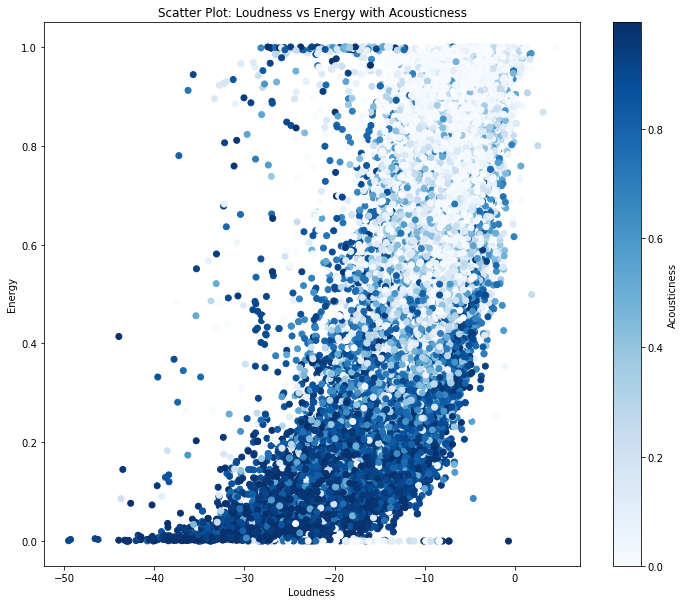

In [11]:
# Extract data for plotting
X = df['loudness']       # X-axis data: Loudness
Y = df['energy']         # Y-axis data: Energy
Z = df['acousticness']   # Color data: Acousticness

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Create a scatter plot
sc = ax.scatter(X, Y, c=Z, cmap=cm.Blues)

# Add a color bar to the plot to show the variation in acousticness
fig.colorbar(sc, ax=ax, label='Acousticness')

# Set labels for the X and Y axes
ax.set_xlabel('Loudness')  # Label for X-axis
ax.set_ylabel('Energy')    # Label for Y-axis

# Set the title of the plot
ax.set_title('Scatter Plot: Loudness vs Energy with Acousticness')

# Display the plot
plt.show()